In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# Clustering

Vamos a realizar otro ejemplo de clasificación usando una técnica de aprendizaje no supervisado.

El clustering es un procedimiento de agrupación de una serie de observaciones de acuerdo con un criterio. Esos criterios son por lo general distancia o similitud. 

La cercanía se define en términos de una determinada función de distancia.

---

Para nuestro ejemplo crearemos un conjunto de datos aleatorio, nuestro objectivo es **crear grupos de las observaciones en base a su distancia.**

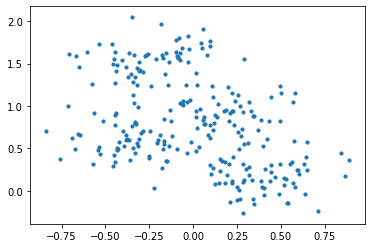

In [45]:
from sklearn.datasets.samples_generator import make_blobs

X, y_true = make_blobs(n_samples=250, centers=4, center_box=(-2.0,2.0), cluster_std=0.2, random_state=0) 

plt.scatter(X[:, 0], X[:, 1], s=10); # Dibujamos los clusters

**La documentación del clasificador nos ayudará a saber lo que podemos con él.**

[Documentación](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

In [46]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4) # Clasificador, este recibe los parámetros
kmeans.fit(X) # Método de aprendizaje
y_kmeans = kmeans.predict(X) # Método de prediccion

# Vamos a construir un dataframe para guardar los resultados
df =  pd.DataFrame.from_dict({"Observaciones":y_true, "Predicciones": y_kmeans})
df

,Observaciones,Predicciones
0,2,0
1,3,1
2,1,2
3,2,0
4,3,1
...,...,...
245,3,1
246,3,1
247,1,2
248,2,0


**Vamos a ver los resultados obtenidos de manera gráfica**

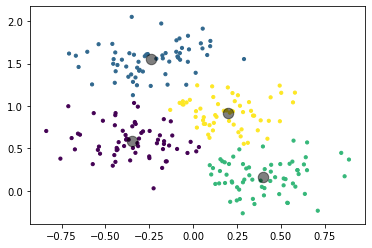

In [47]:

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=10, cmap='viridis')

centers = kmeans.cluster_centers_ # Es una propiedad del clasificador

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=110, alpha=0.5);

## Ejercicio

Vamos a realizar un clustering sobre un conjunto de datos real, el dataset Iris.

Iris es un conjunto de datos muy popular para el aprendizaje.

```python
from sklearn import datasets

iris = datasets.load_iris()
```

En primer lugar realizaremos una primera exploración del conjunto de datos y luego pasaremos a realizar el proceso de clustering

In [52]:
from sklearn import datasets

iris = datasets.load_iris()

print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========